In [60]:
import pandas as pd 
import nltk 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Preprocesing import Process_column
import re

In [52]:
train = pd.read_csv("train.txt",names=['text', 'label'],sep=";")
val = pd.read_csv("val.txt",names=['text', 'label'],sep=";")
test = pd.read_csv("test.txt",names=['text', 'label'],sep=";")


In [53]:
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [54]:
train.duplicated().sum()

np.int64(1)

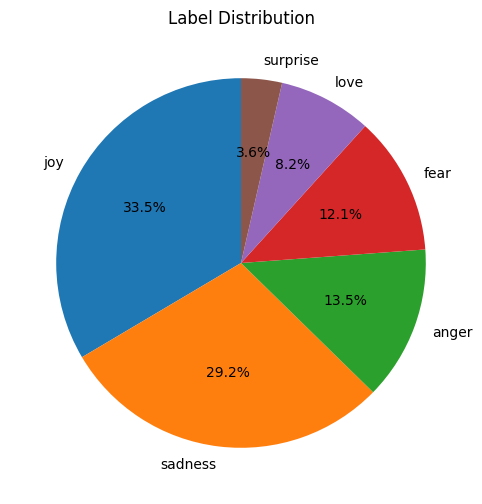

In [55]:
plt.figure(figsize=(6,6))
plt.title("Label Distribution")
plt.pie(train["label"].value_counts(),labels=train["label"].value_counts().keys(),autopct="%1.1f%%",startangle=90)
plt.show()


In [59]:
train["CleanedText"] = train["text"].apply(lambda x: x.lower())
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,i just had a very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...,sadness,i am now turning and i feel pathetic that i am...
15997,i feel strong and good overall,joy,i feel strong and good overall
15998,i feel like this was such a rude comment and i...,anger,i feel like this was such a rude comment and i...


In [58]:
column = Process_column(Column_name="CleanedText",Dataset=train)

In [61]:
column.Updeate_column(func=lambda x: re.sub(r"\b[a-zA-Z]{1}\b"," ",x))
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute to post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,am feeling grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,just had very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...,sadness,am now turning and feel pathetic that am...
15997,i feel strong and good overall,joy,feel strong and good overall
15998,i feel like this was such a rude comment and i...,anger,feel like this was such rude comment and i...


In [62]:
from nltk.tokenize import word_tokenize


column.Updeate_column(lambda x: word_tokenize(x))
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[can, go, from, feeling, so, hopeless, to, so,..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, to, post, feel, greedy,..."
3,i am ever feeling nostalgic about the fireplac...,love,"[am, ever, feeling, nostalgic, about, the, fir..."
4,i am feeling grouchy,anger,"[am, feeling, grouchy]"
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,"[just, had, very, brief, time, in, the, beanba..."
15996,i am now turning and i feel pathetic that i am...,sadness,"[am, now, turning, and, feel, pathetic, that, ..."
15997,i feel strong and good overall,joy,"[feel, strong, and, good, overall]"
15998,i feel like this was such a rude comment and i...,anger,"[feel, like, this, was, such, rude, comment, a..."


In [65]:
from nltk.corpus import stopwords


_stopwords = stopwords.words("english")
print(f"Number of Stop Words in English = {len(_stopwords)}")

Number of Stop Words in English = 198


In [66]:
def Remove_Stopwords(text):
    return [word for word in text if word not in _stopwords]

In [67]:
column.Updeate_column(Remove_Stopwords)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,anger,"[feeling, grouchy]"
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,"[brief, time, beanbag, said, anna, feel, like,..."
15996,i am now turning and i feel pathetic that i am...,sadness,"[turning, feel, pathetic, still, waiting, tabl..."
15997,i feel strong and good overall,joy,"[feel, strong, good, overall]"
15998,i feel like this was such a rude comment and i...,anger,"[feel, like, rude, comment, im, glad]"


In [68]:
from nltk.stem import WordNetLemmatizer

Lemmarizer = WordNetLemmatizer()
def Lemmatizong_data(text:list):
    return [Lemmarizer.lemmatize(word=word,pos="v") for word in text]

column.Updeate_column(Lemmatizong_data)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,"[didnt, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,sadness,"[go, feel, hopeless, damn, hopeful, around, so..."
2,im grabbing a minute to post i feel greedy wrong,anger,"[im, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,anger,"[feel, grouchy]"
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,"[brief, time, beanbag, say, anna, feel, like, ..."
15996,i am now turning and i feel pathetic that i am...,sadness,"[turn, feel, pathetic, still, wait, table, sub..."
15997,i feel strong and good overall,joy,"[feel, strong, good, overall]"
15998,i feel like this was such a rude comment and i...,anger,"[feel, like, rude, comment, im, glad]"


In [69]:
def to_string(text:list):
    return " ".join(text)

column.Updeate_column(to_string)
train

,text,label,CleanedText
0,i didnt feel humiliated,sadness,didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,go feel hopeless damn hopeful around someone c...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property
4,i am feeling grouchy,anger,feel grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,turn feel pathetic still wait table sub teach ...
15997,i feel strong and good overall,joy,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,feel like rude comment im glad


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

In [76]:
X = train["CleanedText"]
Y = train["label"]

In [77]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [78]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_text)

In [79]:
print(f"number of Features = {len(tfidf.get_feature_names_out())}")

number of Features = 10078


In [80]:
svc = SVC(random_state=42)
svc

SVC(random_state=42)

In [81]:
svc.fit(x_train,y_train)
y_predicted = svc.predict(x_test)

In [82]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {svm_acc * 100:.02f}%")

SVM Accurecy score = 82.35%


In [83]:
Dt = DecisionTreeClassifier(random_state=42)
Dt.fit(x_train,y_train)
y_predicted = Dt.predict(x_test)

In [84]:
dt_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Decision Tree Classifier Accurecy score = {dt_acc * 100:.02f}%")

Decision Tree Classifier Accurecy score = 81.71%


In [85]:
Dt = MultinomialNB()
Dt.fit(x_train,y_train)
y_predicted = Dt.predict(x_test)

In [86]:
acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"Multinomial Naive Bayes Accurecy score = {acc * 100:.02f}%")

Multinomial Naive Bayes Accurecy score = 66.23%
